Column Details:

1. **age**: Age of the individual purchasing medical insurance.  
2. **sex**: Gender of the individual (male or female).  
3. **bmi**: Body Mass Index of the individual, a measure of body fat based on height and weight.  
4. **children**: Number of dependent children covered by the insurance.  
5. **smoker**: Smoking status of the individual (yes or no).  
6. **region**: Geographic region of the individual (e.g., northwest, southeast).  
7. **charges**: Total medical insurance premium charged to the individual.

In [1]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

* We have 1334 rows and 7 columns
* Below are the names of the columns we will be working with

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Lukily no null vlaues.

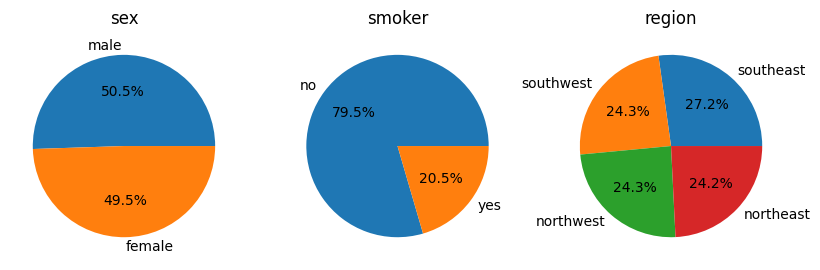

In [7]:
# pie plots for sex, smoker and region to understand their numbers
features = ['sex','smoker','region']
plt.figure(figsize = (10,5))
i=0
for col in features:
    i+=1
    plt.subplot(1, 3, i)
    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
    plt.title(col)
plt.show()

* We can see the sex is distributed almost equally
* Smoker is in the ratio 80:20
* Region wise they all are distributed adequately.

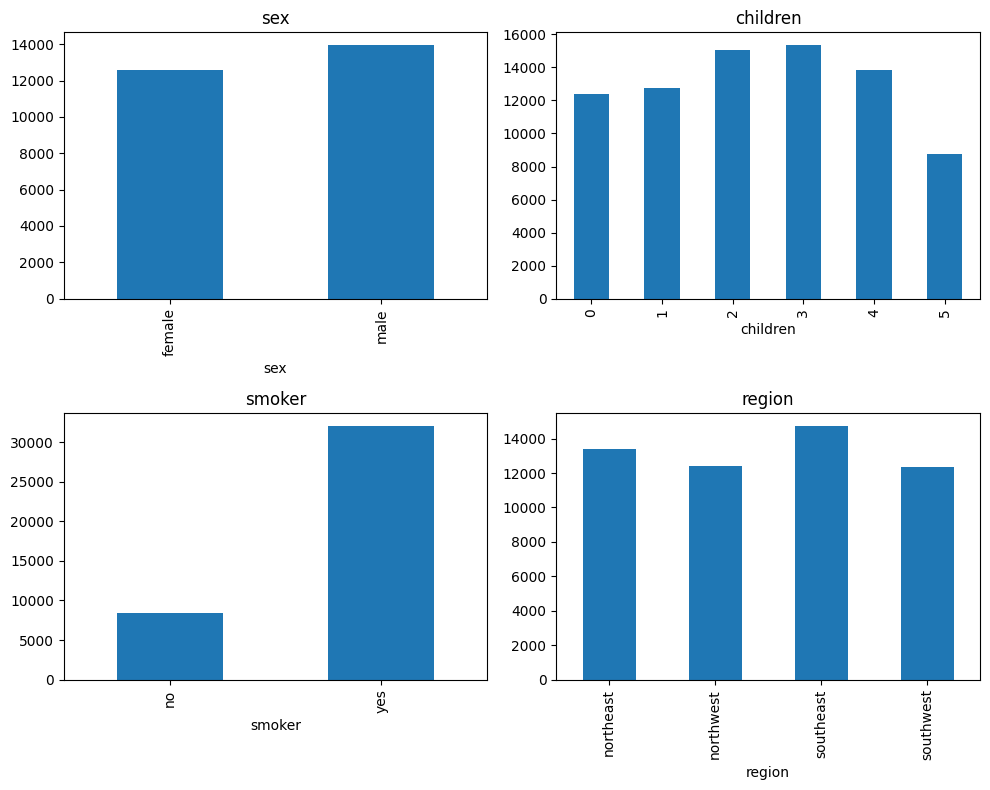

In [9]:
features = ['sex', 'children', 'smoker', 'region']
plt.figure(figsize=(10,8))
i=0
for col in features:
    i+=1
    plt.subplot(2, 2, i)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
    plt.title(col)
plt.tight_layout()
plt.show()

* We can observe the distribution of charges among the following columns.
* The chages applied for 2 and 3 childern is the most.
* Charges are slighlty on the higher side of males
* Premium charged for smokers is more than 3 times than a non smoker.
* Charges are approximately same in the given four regions.


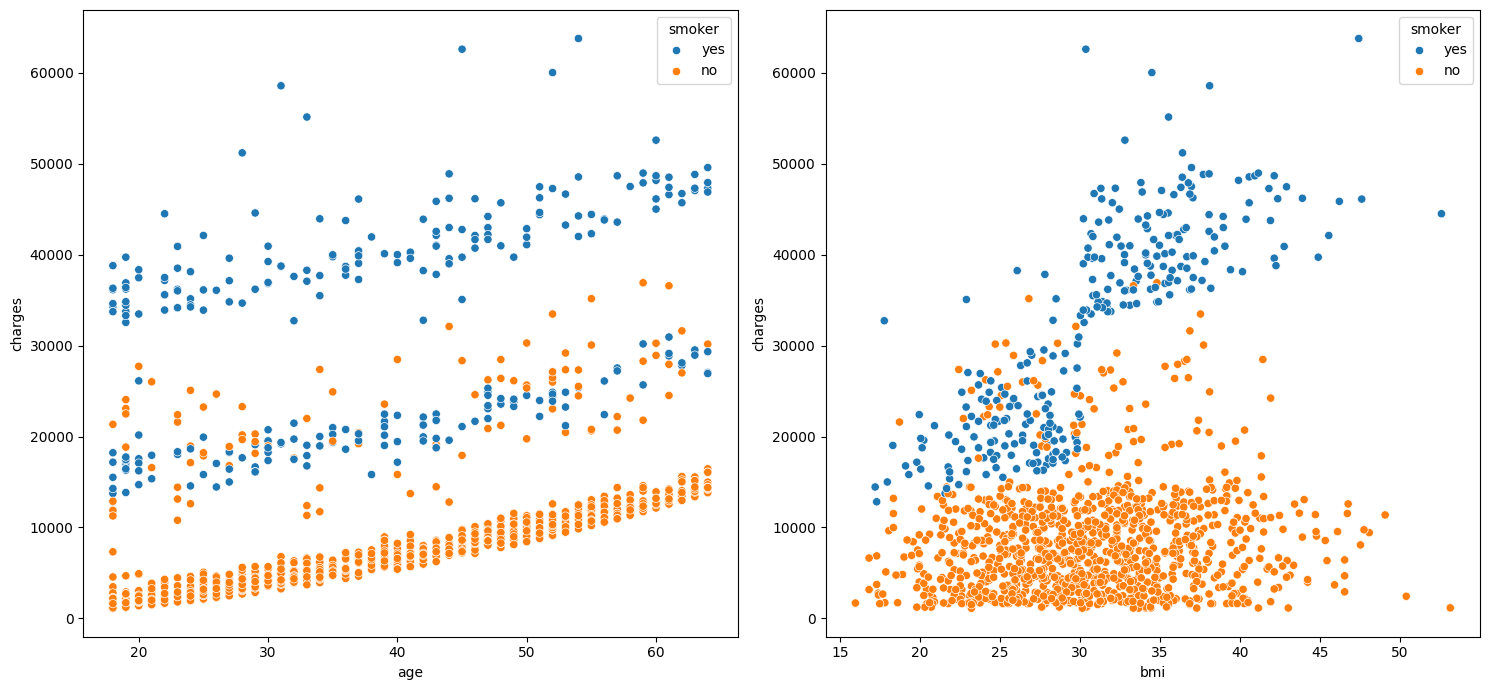

In [10]:
features = ['age', 'bmi']

plt.figure(figsize=(15, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker')
plt.tight_layout()
plt.show()

* We can see there is a clearn elevation as the age increases the premium charged increased gradually.
* We can also see that the premium paid by the smokers are way more than non smokers.


In [11]:
# Let's check for duplicated values
df.duplicated().sum()

1

* We have one let's remove it.

In [12]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1338, 7)
(1337, 7)


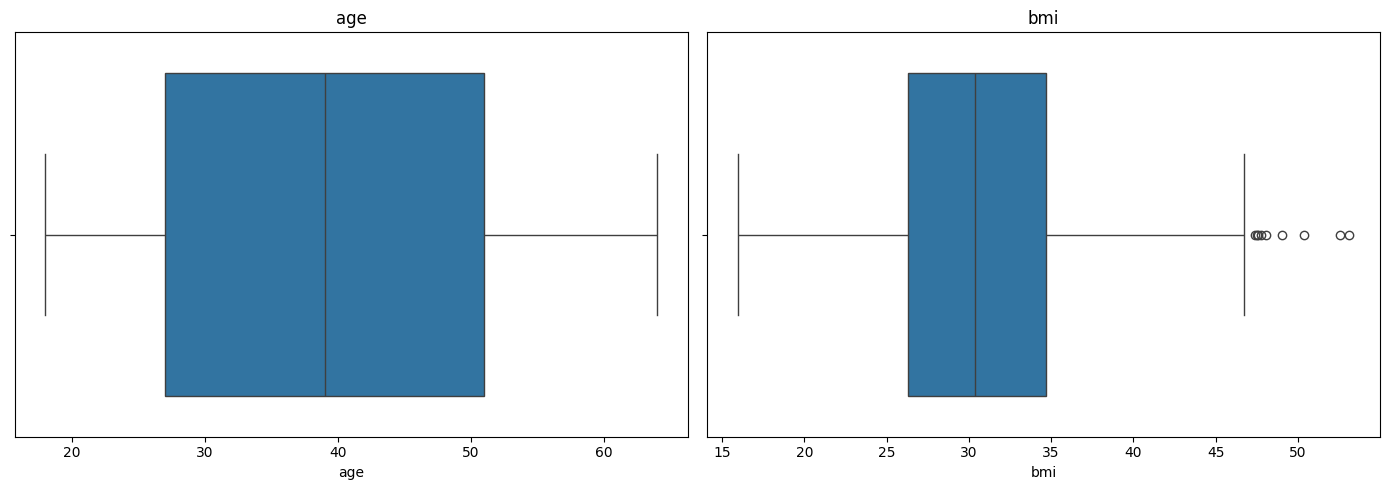

In [13]:
# Let's check if we have any outliers in 'age' and 'bmi'

features = ['age','bmi']
plt.figure(figsize=(14, 5))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

*   We have few outliers in bmi columns.
* Let's get rid of those.

In [14]:
# Let's remove outliers using IQR method
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(df.shape)
df = df[(df['bmi'] >= lower) & (df['bmi'] <= upper)]
print(df.shape)

(1337, 7)
(1328, 7)


* Outliers have been removed.

**Data Wrangling**
* Let's check the skewness of those columns to make sure it follows normal or standatd distribution.

In [15]:
print(df['bmi'].skew())
print(df['age'].skew())

0.15714074884049561
0.057520907909550154


* Data distributed across both columns are almost normal which is good for building the model.

In [16]:
# Let's encode the data from categorical to numerical using LabelEncoding
from sklearn.preprocessing import LabelEncoder

for col in ['sex','smoker','region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


* We can see that all the columns are in numerical format, now it is ready to be fed to the ML models.

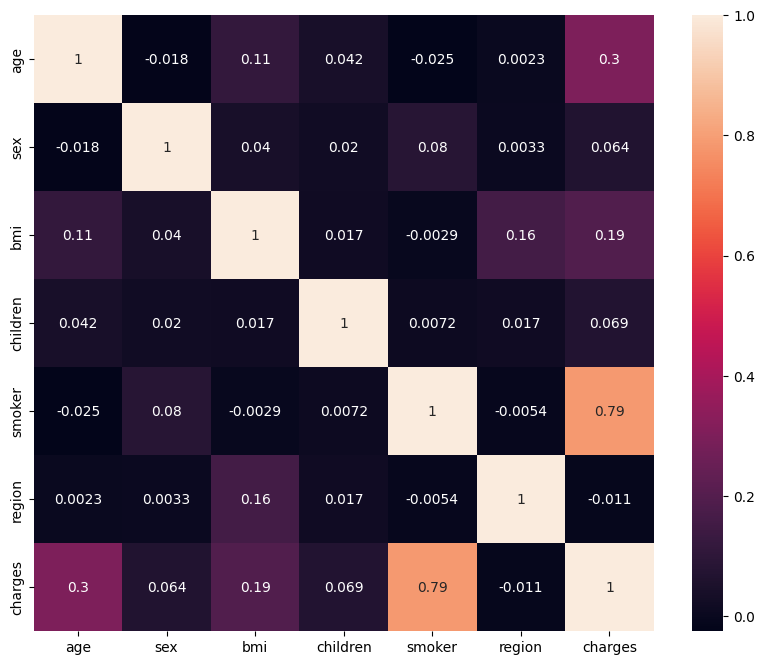

In [17]:
#Let's checl for correlation among the columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

* We can find both positive and negative correlated columns in this.
* Charges seems to be moderately correlated but it will be removed while training and testing so we'll not do anything

**Model Development**

In [18]:
# Feature Extraction
x = df.drop(['charges'], axis=1)
y = df['charges']
x.shape, y.shape

((1328, 6), (1328,))

In [19]:
#Let's scale all the features
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_scaled = scaler.fit_transform(x)

* The LR model performed the same before and after scaling it with Standard Scaler so we are avoiding it.

In [20]:
# Split the data set for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1062, 6), (266, 6), (1062,), (266,))



---


Let's build **Multiple Linear Regressor** Model for the above Dataset

In [21]:
# Let's built a MLR model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
# model evaluation
from sklearn.model_selection import cross_val_score

print("Training Score: ",lr.score(x_train, y_train))
print("Testing Score: ",lr.score(x_test, y_test))
print("Cross Validation Score: ", cross_val_score(lr, x, y, cv=5,).mean())

Training Score:  0.7505837312789694
Testing Score:  0.7444762584926317
Cross Validation Score:  0.7464099135301827


We can see that:
* Training Score:  0.7522882306936458
* Testing Score:  0.7466676802430627
* Cross Validation Score:  0.7482260966716718
* Form all this we can say our model is stable but it is performing ok


---

Let's implement **Random Forest Regressor** for the above dataset.

In [23]:
# Let's built a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [24]:
# Model Evaluation
from sklearn.metrics import r2_score

print("Training R2 Score: ",r2_score(rfr.predict(x_train), y_train))
print("Testing R2 Score: ",r2_score(rfr.predict(x_test), y_test))
print("Cross Validation Score: ", cross_val_score(rfr, x, y, cv=5,).mean())

Training R2 Score:  0.9745936715975638
Testing R2 Score:  0.7953436459716302
Cross Validation Score:  0.8350427210008883


* We can see here the model is performing extremely well on training data.
* The model is not performing as good on testing data like training data.
* Hence we can say the model is pruned to overfit.

In [25]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

#defining parameters to evaluate the model with
param_grid = {
    'n_estimators':[10,40,50,90,100, 120, 150, 200],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2, 5, 10]
}

grid_rfr = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                        param_grid=param_grid,
                        scoring='r2',
                        cv=5)
grid_rfr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 40, 50, 90, 100, 120, 150, 200]},
             scoring='r2')

In [26]:
#Printing the best parameters for the grid
print("Best Parameters are :",grid_rfr.best_params_)

Best Parameters are : {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}


In [27]:
# Let's build the best model from above
rfr_best = RandomForestRegressor(random_state=42, n_estimators=150, max_depth=10, min_samples_split=10)
rfr_best.fit(x_train, y_train)
print("Training Score: ", r2_score(rfr_best.predict(x_train), y_train))
print("Testing Score: ", r2_score(rfr_best.predict(x_test), y_test))
print("Cross Validation Score",cross_val_score(rfr_best,x,y,cv=5,).mean())

Training Score:  0.922373538101874
Testing Score:  0.808401360109831
Cross Validation Score 0.8462222759022964


* The best model's testing r2 score increased by 0.02.
* We can say that our model is a good model.


---

Let's implement **Gradient Boosting Algorithm** for the same

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [29]:
#model evaluation

print("Training Score: ", r2_score(gb.predict(x_train), y_train))
print("Testing Score: ", r2_score(gb.predict(x_test), y_test))
print("Cross Validation Score",cross_val_score(gb,x,y,cv=5,).mean())

Training Score:  0.893718913059468
Testing Score:  0.8231128910805753
Cross Validation Score 0.853328120820039


* It is performing better than Random Forest
* Let's tune it to get better results.

In [30]:
# Let's tune it using GridSearchCV

param_grid = {
    'n_estimators':[10,15, 19, 20, 21, 50],
    'learning_rate':[0.1,0.19, 0.2, 0.21, 0.8, 1]
}
grid_gb = GridSearchCV(estimator=GradientBoostingRegressor(),
                       param_grid = param_grid,
                       scoring='r2',
                       cv=5)
grid_gb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.19, 0.2, 0.21, 0.8, 1],
                         'n_estimators': [10, 15, 19, 20, 21, 50]},
             scoring='r2')

In [31]:
#Printing the best parameters for the grid
print("Best Parameters are :",grid_gb.best_params_)

Best Parameters are : {'learning_rate': 0.1, 'n_estimators': 50}


In [32]:
# Let's build the best model from above
gb_best = GradientBoostingRegressor(n_estimators=21, learning_rate=0.19)
gb_best.fit(x_train, y_train)
print("Training Score: ", r2_score(gb_best.predict(x_train), y_train))
print("Testing Score: ", r2_score(gb_best.predict(x_test), y_test))
print("Cross Validation Score",cross_val_score(gb_best, x, y, cv=5,).mean())

Training Score:  0.8615647696295516
Testing Score:  0.8314984234318428
Cross Validation Score 0.8596748998948067


We can see that we are getting better cross valiation score here.


---

Let's implement the same thing with **XGBRegressor**

* In this example we are using the below versions of the libraries
* xgboost - 1.7.3
* scikit-learn - 1.3.1

In [39]:
#Let's implement XGBRegressor
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
#model evaluation

print("Training Score: ", r2_score(xgbr.predict(x_train), y_train))
print("Testing Score: ", r2_score(xgbr.predict(x_test), y_test))
print("Cross Validation Score",cross_val_score(xgbr,x,y,cv=5,).mean())

Training Score:  0.9952795320945879
Testing Score:  0.7882359111517259
Cross Validation Score 0.8063415442836732


In [45]:
# Let's tune it using GridSearchCV

param_grid = {
    'n_estimators':[10,15, 20, 40, 50],
    'max_depth':[3, 4, 5, 10, 20],
    'gamma':[0,0.15, 0.3, 0.5, 1]
}
grid_xgbr = GridSearchCV(estimator=XGBRegressor(),
                       param_grid = param_grid,
                       scoring='r2',
                       cv=5)
grid_xgbr.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0, 0.15, 0.3, 0.5, 1],
                         'max_depth': [3, 4, 5, 10, 20],
                         'n_estimators': [10, 15, 20, 40, 50]},
             scoring='r2')

In [46]:
#Printing the best parameters for the grid
print("Best Parameters are :",grid_xgbr.best_params_)

Best Parameters are : {'gamma': 0, 'max_depth': 3, 'n_estimators': 20}


In [53]:
# Let's build the best model from above
xgbr_best = XGBRegressor(n_estimators=20, max_depth=3, gamma=0)
xgbr_best.fit(x_train, y_train)
print("Training Score: ", r2_score(xgbr_best.predict(x_train), y_train))
print("Testing Score: ", r2_score(xgbr_best.predict(x_test), y_test))
print("Cross Validation Score",cross_val_score(xgbr_best, x, y, cv=5,).mean())

Training Score:  0.8725254394406435
Testing Score:  0.8307811521429582
Cross Validation Score 0.8572524476707265


### Model Performance Comparison

| Model                  | Training Score | Testing Score | Cross Validation Score |
|------------------------|---------------|--------------|------------------------|
| **Linear Regression**  | 0.7506        | 0.7445       | 0.7464                 |
| **Random Forest Regressor** | 0.9224        | 0.8084       | 0.8462                 |
| **Gradient Boosting Regressor** | 0.8616        | 0.8315       | 0.8597                 |
| **XGBoost Regressor**  | 0.8725        | 0.8308       | 0.8573                 |


<Axes: >

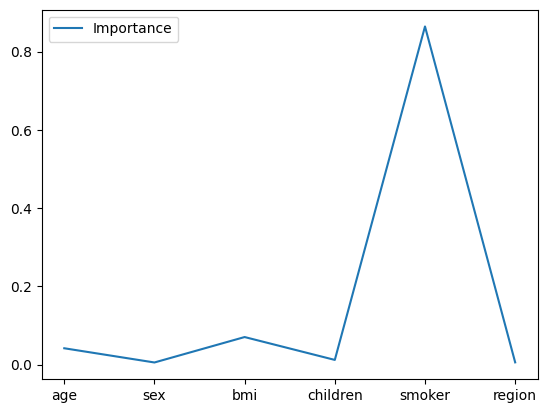

In [56]:
# Let's check feature importance
feats=pd.DataFrame(data=grid_xgbr.best_estimator_.feature_importances_,index=x.columns,columns=['Importance'])
feats.plot()

We can see that the smoker is the most important feature to determine the charges of premium for a medical insurance price prediction.

In [57]:
# Let's get the most important features
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.041880
bmi,0.070538
children,0.012118
smoker,0.864049


These 4 are the most important features for the predictive model.

---

Let's buid the final model.

In [58]:
xf = df[['age','bmi','children','smoker']]
yf = df['charges']

xf_train, xf_test, yf_train, yf_test = train_test_split(xf, yf, test_size=0.2, random_state=42)

# Let's build the best model from above
gb_final = GradientBoostingRegressor(n_estimators=21, learning_rate=0.19)
gb_final.fit(xf_train, yf_train)
print("Training Score: ", r2_score(gb_final.predict(xf_train), yf_train))
print("Testing Score: ", r2_score(gb_final.predict(xf_test), yf_test))
print("Cross Validation Score",cross_val_score(gb_final, xf, yf, cv=5,).mean())

Training Score:  0.8600185104241707
Testing Score:  0.8355352507326695
Cross Validation Score 0.8583038578241358


In [61]:
# Let's dump the model in pikle format
from pickle import dump

dump(gb_final, open('insurance_model.pkl','wb'))

In [62]:
# A predictive system
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
gb_final.predict(new_data)

array([18356.48262778])

Thank you for going through my work till the very end, feel free to get in touch if you have any doubt... :)